In [1]:
#include <iostream>
#include <string>
#include <stdio.h>

TFile *file = TFile::Open("Data_8TeV.root"); 
TTree *tree = (TTree*) file->Get("mini");

TFile *file_MC = TFile::Open("ttbar_8TeV.root"); 
TTree *tree_MC = (TTree*) file_MC->Get("mini");

//--------------------DEFINITIONS OF MOST PARAMETERS

Bool_t e_trig;             Bool_t e_trig_MC;
Bool_t mu_trig;            Bool_t mu_trig_MC;
Bool_t good_vtx;           Bool_t good_vtx_MC;
UInt_t lep_n;              UInt_t lep_n_MC;
UInt_t jet_n;              UInt_t jet_n_MC;
Float_t MET;               Float_t MET_MC;
Float_t MET_phi;           Float_t MET_phi_MC;
 
Float_t lep_pt[10];        Float_t lep_pt_MC[10];  
Float_t lep_eta[10];       Float_t lep_eta_MC[10];  
Float_t lep_phi[10];       Float_t lep_phi_MC[10];  
Float_t lep_E[10];         Float_t lep_E_MC[10];  
Int_t lep_type[10];        Int_t lep_type_MC[10];  
Float_t lep_ptcone30[10];  Float_t lep_ptcone30_MC[10];
Float_t lep_etcone20[10];  Float_t lep_etcone20_MC[10];
 
Float_t jet_pt[10];        Float_t jet_pt_MC[10];
Float_t jet_eta[10];       Float_t jet_eta_MC[10];
Float_t jet_jvf[10];       Float_t jet_jvf_MC[10];
Float_t jet_MV1[10];       Float_t jet_MV1_MC[10];
 
tree->SetBranchAddress("trigE", &e_trig);              tree_MC->SetBranchAddress("trigE", &e_trig_MC);
tree->SetBranchAddress("trigM", &mu_trig);             tree_MC->SetBranchAddress("trigM", &mu_trig_MC);
tree->SetBranchAddress("hasGoodVertex", &good_vtx);    tree_MC->SetBranchAddress("hasGoodVertex", &good_vtx_MC);
tree->SetBranchAddress("lep_n", &lep_n);               tree_MC->SetBranchAddress("lep_n", &lep_n_MC);
tree->SetBranchAddress("jet_n", &jet_n);               tree_MC->SetBranchAddress("jet_n", &jet_n_MC);
tree->SetBranchAddress("met_et", &MET);                tree_MC->SetBranchAddress("met_et", &MET_MC);
tree->SetBranchAddress("met_phi", &MET_phi);           tree_MC->SetBranchAddress("met_phi", &MET_phi_MC);
 
tree->SetBranchAddress("lep_pt", &lep_pt);             tree_MC->SetBranchAddress("lep_pt", &lep_pt_MC);
tree->SetBranchAddress("lep_eta", &lep_eta);           tree_MC->SetBranchAddress("lep_eta", &lep_eta_MC);
tree->SetBranchAddress("lep_phi", &lep_phi);           tree_MC->SetBranchAddress("lep_phi", &lep_phi_MC);
tree->SetBranchAddress("lep_E", &lep_E);               tree_MC->SetBranchAddress("lep_E", &lep_E_MC);
tree->SetBranchAddress("lep_type", &lep_type);         tree_MC->SetBranchAddress("lep_type", &lep_type_MC);
tree->SetBranchAddress("lep_ptcone30", &lep_ptcone30); tree_MC->SetBranchAddress("lep_ptcone30", &lep_ptcone30_MC);
tree->SetBranchAddress("lep_etcone20", &lep_etcone20); tree_MC->SetBranchAddress("lep_etcone20", &lep_etcone20_MC);
 
tree->SetBranchAddress("jet_pt", &jet_pt);             tree_MC->SetBranchAddress("jet_pt", &jet_pt_MC);
tree->SetBranchAddress("jet_eta", &jet_eta);           tree_MC->SetBranchAddress("jet_eta", &jet_eta_MC);
tree->SetBranchAddress("jet_jvf", &jet_jvf);           tree_MC->SetBranchAddress("jet_jvf", &jet_jvf_MC);
tree->SetBranchAddress("jet_MV1", &jet_MV1);           tree_MC->SetBranchAddress("jet_MV1", &jet_MV1_MC);
 
//----------Event weights
float evtw = 1;
float mcevtw;     tree_MC->SetBranchAddress("mcWeight", &mcevtw);

//----------ScaleFactors
Float_t scaleFactor_PILEUP;    tree_MC->SetBranchAddress("scaleFactor_PILEUP", &scaleFactor_PILEUP);
Float_t scaleFactor_ELE;       tree_MC->SetBranchAddress("scaleFactor_ELE", &scaleFactor_ELE);
Float_t scaleFactor_MUON;      tree_MC->SetBranchAddress("scaleFactor_MUON", &scaleFactor_MUON);
Float_t scaleFactor_BTAG;      tree_MC->SetBranchAddress("scaleFactor_BTAG", &scaleFactor_BTAG);
Float_t scaleFactor_TRIGGER;   tree_MC->SetBranchAddress("scaleFactor_TRIGGER", &scaleFactor_TRIGGER);
Float_t scaleFactor_JVFSF;     tree_MC->SetBranchAddress("scaleFactor_JVFSF", &scaleFactor_JVFSF);
Float_t scaleFactor_ZVERTEX;   tree_MC->SetBranchAddress("scaleFactor_ZVERTEX", &scaleFactor_ZVERTEX);

//----------indices
int nentries, nentries_MC, nbytes, i;
nentries = (Int_t)tree->GetEntries();
nentries_MC = (Int_t)tree_MC->GetEntries();

TCanvas *canvas = new TCanvas("Canvas","",600,450); canvas->SetGrid();

//tree->Print()
tree_MC->Print()

******************************************************************************
*Tree    :mini      : 4-vectors + variables required for scaling factors     *
*Entries :  1500000 : Total =       567791759 bytes  File  Size =  300057248 *
*        :          : Tree compression factor =   1.89                       *
******************************************************************************
*Br    0 :runNumber : runNumber/I                                            *
*Entries :  1500000 : Total  Size=    6002049 bytes  File Size  =      31136 *
*Baskets :       18 : Basket Size=     790016 bytes  Compression= 192.75     *
*............................................................................*
*Br    1 :eventNumber : eventNumber/I                                        *
*Entries :  1500000 : Total  Size=    6002093 bytes  File Size  =    3819950 *
*Baskets :       18 : Basket Size=     790016 bytes  Compression=   1.57     *
*...................................................

### Data histograms (before cuts)

In [2]:
TH1F *hist_lep_pt = new TH1F("Lepton pT","Lepton pT; pT(GeV);Events",100,25,180);
TH1F *hist_track_isol = new TH1F("Tracker isolation","Tracker isolation; lep_ptcone30/lep_pt;Events",100,-5,300);
TH1F *hist_cal_isol = new TH1F("Calorimeter isolation","Calorimeter isolation; lep_etcone20/lep_pt;Events",100,-5,40);
TH1F *hist_lep_eta = new TH1F("Lepton eta","Lepton eta; #eta;Events",100,-4,4);

TH1F *hist_njets = new TH1F("Number of jets","n-jets; Jet multiplicity; Events",10,0.5,10.5);
TH1F *hist_jet_pt = new TH1F("jet pT","jet pT; pT(GeV);Events",100,0,120);
TH1F *hist_jet_eta = new TH1F("jet eta","jet eta; #eta;Events",100,-4,4);
TH1F *hist_jet_jvf = new TH1F("jet JVF","jet JVF; JVF; Events",100,-3,3);
TH1F *hist_jet_MV1 = new TH1F("jet MV1","jet MV1; MV1; Events",100,-1,2);
TH1F *hist_n_bjets = new TH1F("numero de b-jets","b-jets por evento; bjets; Events",5,0.5,5.5);

TH1F *hist_MET = new TH1F("Missing ET","MET; MET(GeV); Events",100,0,140);
TH1F *hist_mTW = new TH1F("hist_mTW","hist_mTW; m_T(W); Events",100,0,250e3);

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i); 
    
    for (unsigned int j=0; j<lep_n; j++){
        hist_lep_pt->Fill(lep_pt[j]/1000,1);      hist_track_isol->Fill(lep_ptcone30[j]/lep_pt[j],1);         
        hist_lep_eta->Fill(lep_eta[j],1);         hist_cal_isol->Fill(lep_etcone20[j]/lep_pt[j],1); 
    }
    
    hist_njets->Fill(jet_n,1);
    
    int num_bjets = 0;
    for (unsigned int j=0; j<jet_n; j++){
        hist_jet_pt->Fill(jet_pt[j]/1000,1);      hist_jet_jvf->Fill(jet_jvf[j],1);
        hist_jet_eta->Fill(jet_eta[j],1);         hist_jet_MV1->Fill(jet_MV1[j],1);
        if(jet_MV1[j] > 0.7892) num_bjets++;
    }
    
    hist_n_bjets->Fill(num_bjets,1);
    hist_MET->Fill(MET/1000.,1);
    
    TLorentzVector Lepton  = TLorentzVector();    TLorentzVector  MeT  = TLorentzVector();
    Lepton.SetPtEtaPhiE(lep_pt[0],lep_eta[0],lep_phi[0],lep_E[0]);
    MeT.SetPtEtaPhiE(MET,0,MET_phi,MET);              
    float mTW = sqrt(2*Lepton.Pt()*MeT.Et()*(1-cos(Lepton.DeltaPhi(MeT))));
    hist_mTW->Fill(mTW,1);
}

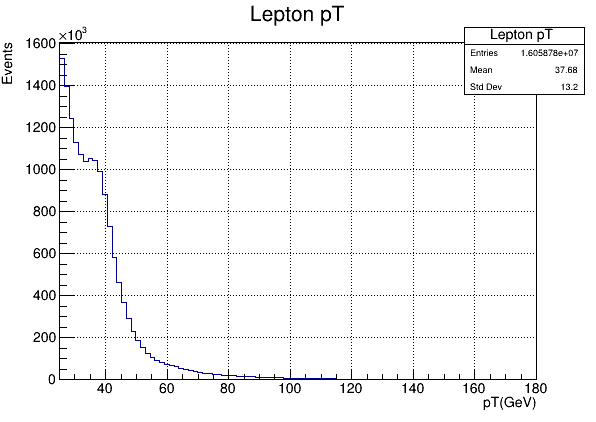

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file ./figsDataVsMC/beforeCut_lep_pT.png has been created


In [3]:
TCanvas *canvas = new TCanvas("Canvas","",600,450); canvas->SetGrid();
hist_lep_pt->Draw(); canvas->Draw(); canvas->SaveAs("./figsDataVsMC/beforeCut_lep_pT.png")

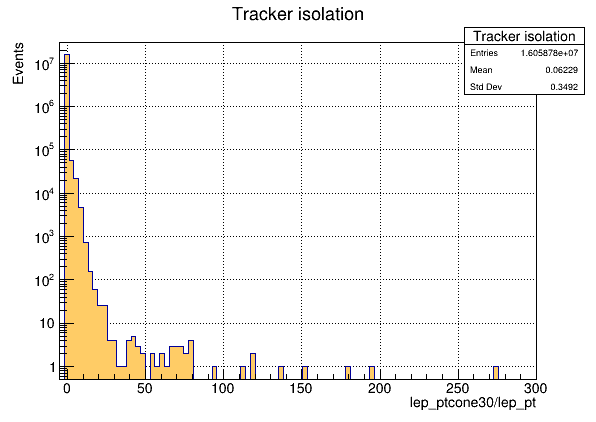

Info in <TCanvas::Print>: png file ./figsDataVsMC/beforeCut_track_isol.png has been created


In [4]:
hist_track_isol->SetFillColor(kOrange-4); 
hist_track_isol->Draw(); canvas->SetLogy(); canvas->Draw(); canvas->SaveAs("./figsDataVsMC/beforeCut_track_isol.png")

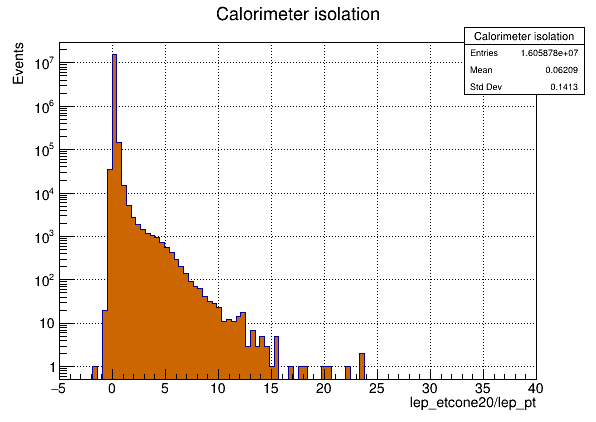

Info in <TCanvas::Print>: png file ./figsDataVsMC/beforeCut_cal_isol.png has been created


In [5]:
hist_cal_isol->SetFillColor(kOrange+2); 
hist_cal_isol->Draw(); canvas->SetLogy(); canvas->Draw(); canvas->SaveAs("./figsDataVsMC/beforeCut_cal_isol.png")

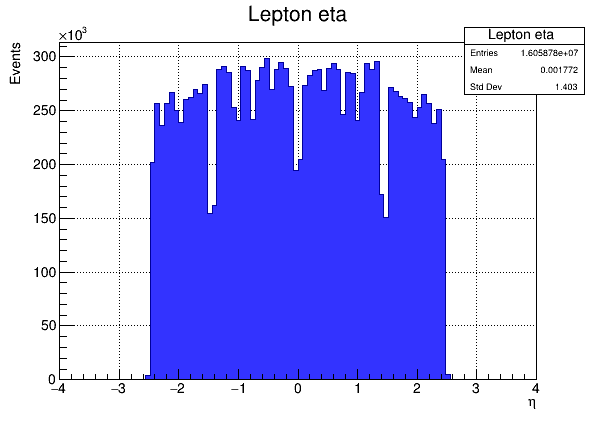

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file ./figsDataVsMC/beforeCut_lep_eta.png has been created


In [6]:
TCanvas *canvas = new TCanvas("Canvas","",600,450); canvas->SetGrid(); 
hist_lep_eta->SetFillColor(kBlue-4); 
hist_lep_eta->Draw(); canvas->Draw(); canvas->SaveAs("./figsDataVsMC/beforeCut_lep_eta.png")

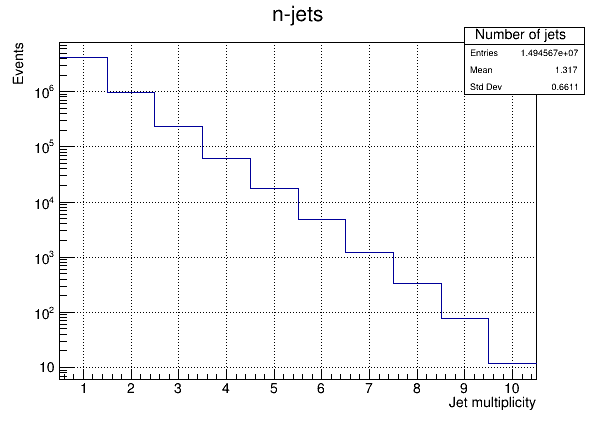

Info in <TCanvas::Print>: png file ./figsDataVsMC/beforeCut_njets.png has been created


In [7]:
hist_njets->Draw(""); canvas->SetLogy(); canvas->Draw(); canvas->SaveAs("./figsDataVsMC/beforeCut_njets.png")

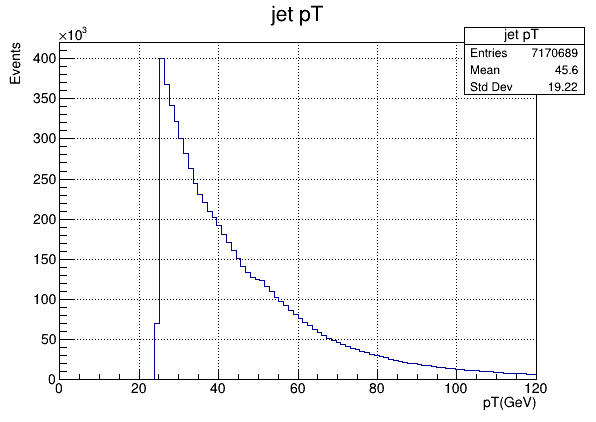

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file ./figsDataVsMC/beforeCut_jet_pT.png has been created


In [8]:
TCanvas *canvas = new TCanvas("Canvas","",600,450); canvas->SetGrid(); 
hist_jet_pt->Draw(); canvas->Draw(); canvas->SaveAs("./figsDataVsMC/beforeCut_jet_pT.png")

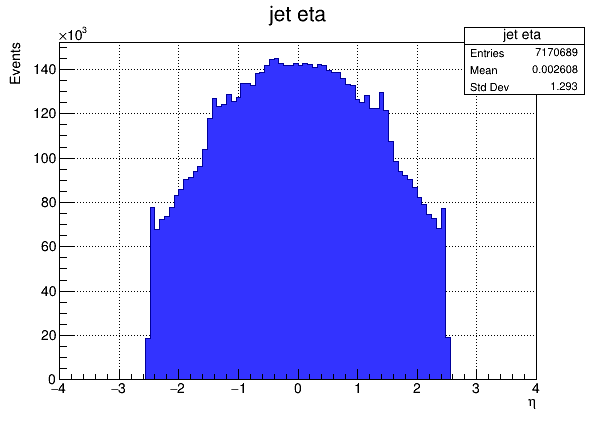

Info in <TCanvas::Print>: png file ./figsDataVsMC/beforeCut_jet_eta.png has been created


In [9]:
hist_jet_eta->SetFillColor(kBlue-4); 
hist_jet_eta->Draw(); canvas->Draw(); canvas->SaveAs("./figsDataVsMC/beforeCut_jet_eta.png")

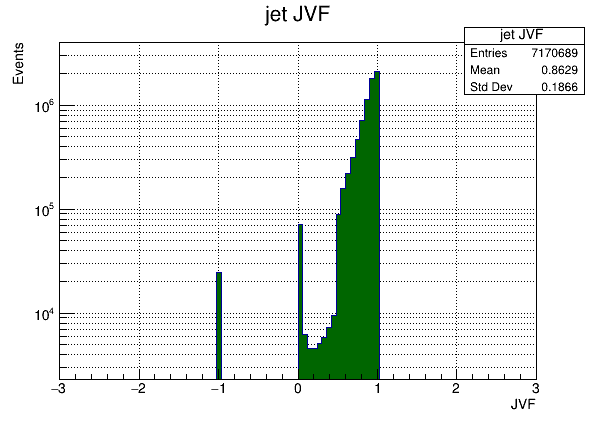

Info in <TCanvas::Print>: png file ./figsDataVsMC/beforeCut_jet_JVF.png has been created


In [10]:
hist_jet_jvf->SetFillColor(kGreen+3);
hist_jet_jvf->Draw(""); canvas->SetLogy(); canvas->Draw(); canvas->SaveAs("./figsDataVsMC/beforeCut_jet_JVF.png")

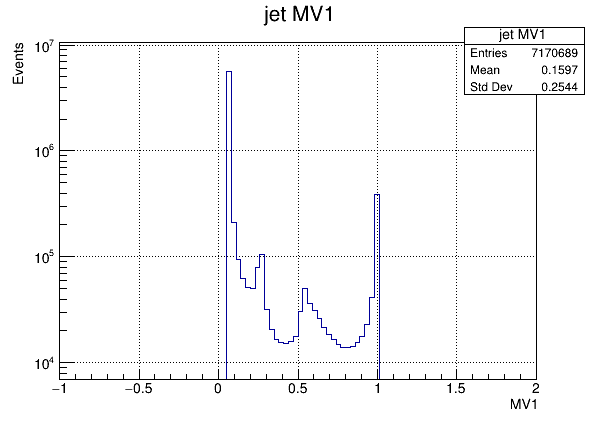

Info in <TCanvas::Print>: png file ./figsDataVsMC/beforeCut_MV1.png has been created


In [11]:
hist_jet_MV1->Draw(""); canvas->SetLogy(); canvas->Draw(); canvas->SaveAs("./figsDataVsMC/beforeCut_MV1.png")

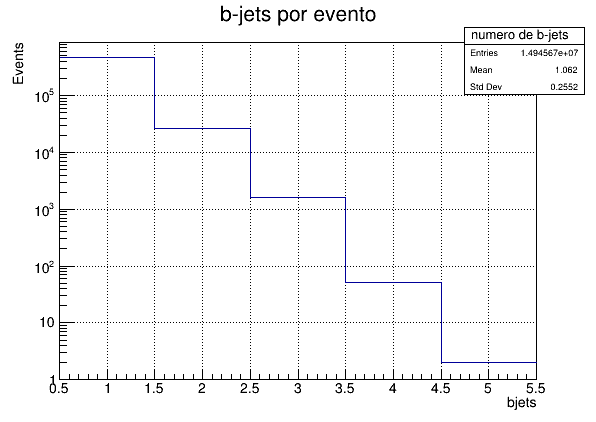

Info in <TCanvas::Print>: png file ./figsDataVsMC/beforeCut_nbjets.png has been created


In [12]:
hist_n_bjets->Draw(""); canvas->Draw(); canvas->SaveAs("./figsDataVsMC/beforeCut_nbjets.png")

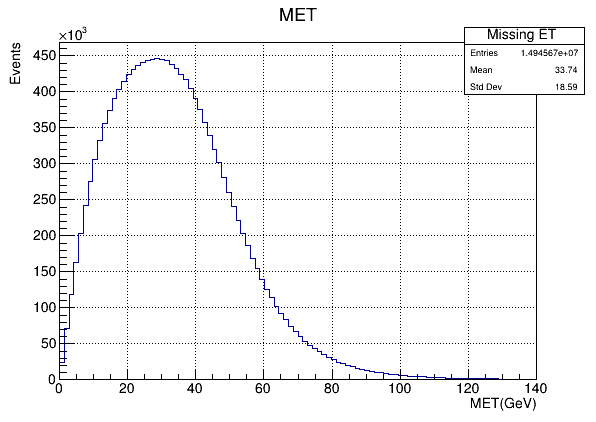

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file ./figsDataVsMC/beforeCut_MET.png has been created


In [13]:
TCanvas *canvas = new TCanvas("Canvas","",600,450); canvas->SetGrid(); 
hist_MET->Draw(); canvas->Draw(); canvas->SaveAs("./figsDataVsMC/beforeCut_MET.png")

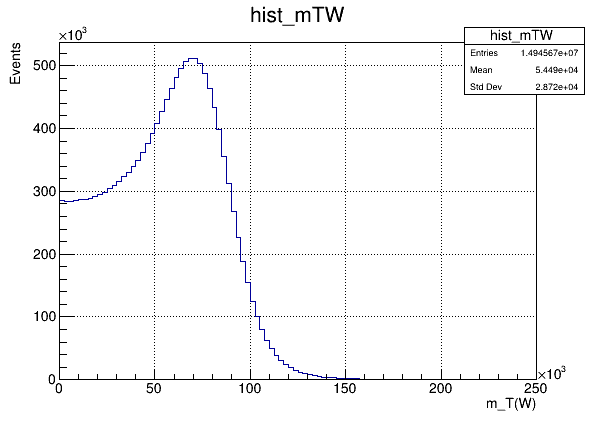

Info in <TCanvas::Print>: png file ./figsDataVsMC/beforeCut_mTW.png has been created


In [14]:
hist_mTW->Draw(); canvas->Draw(); canvas->SaveAs("./figsDataVsMC/beforeCut_mTW.png")

------------------

# Data cutflow

In [26]:
TH1F *cutflow = new TH1F("Cutflow","Cutflow; Cut; Events",8,0.5,8.5);
int cut1 = 0; int cut2 = 0; int cut3 = 0; int cut4 = 0; int cut5 = 0; int cut6 = 0; int cut7 = 0; int cut8 = 0;

TH1F *hist_jet_pt_cut = new TH1F("Jet pT cut","Jet pT cut; pT(GeV);Events",50,20,300);
TH1F *hist_lep_pt_cut = new TH1F("Lepton pT cut","Lepton pT cut; pT(GeV);Events",50,25,180);
TH1F *hist_mTW_cut = new TH1F("hist_mTW cut","hist_mTW cut; m_T(W); Events",50,0,250e3);
TH1F *hist_MET_cut = new TH1F("Missing ET cut","MET cut; MET(GeV); Events",50,0,200);
TH1F *hist_jet_jvf_cut = new TH1F("jet JVF cut","jet JVF cut; JVF; Events",50,-3,3);

TH1F *hist_njets_cut = new TH1F("Number of jets cut","n-jets cut; Jet multiplicity; Events",5,3.5,8.5);
TH1F *hist_bjets_cut = new TH1F("Number of b-jets cut","n-bjets cut; Jet multiplicity; Events",5,1.5,6.5);

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   

    //First cut: Good vertex
    if(!good_vtx) continue;               cut1++;   cutflow->Fill(1);

    //Second cut: Trigger
    if(!e_trig && !mu_trig) continue;     cut2++;   cutflow->Fill(2);
        
    // Preselection of good leptons                                                                                
    int n_lep = 0;
    int gli = 0; //good lepton index
    for(unsigned int j=0; j<lep_n; j++){
        int n_mu=0; int n_el=0;    
        
        if( lep_pt[j] < 25000.) continue; 
        if( lep_ptcone30[j]/lep_pt[j] > 0.15 ) continue; 
        if( lep_etcone20[j]/lep_pt[j] > 0.15 ) continue;  
        if( lep_type [j]==13 && TMath::Abs(lep_eta[j]) < 2.5 )       {n_mu++;}
        if( lep_type [j]==11 && ( (TMath::Abs(lep_eta[j]) < 2.47 && TMath::Abs(lep_eta[j]) > 1.52)
                                  ||
                                  (TMath::Abs(lep_eta[j]) < 1.37)) ) {n_el++;}
        if(n_mu == 0 && n_el == 0) continue;
        n_lep++;       gli = j;
        }
    
    //Third cut (one good lepton):
    if(n_lep!=1) continue;     cutflow->Fill(3);    cut3++;
  
    //ON JETS
    int n_jets=0; int n_bjets=0;
    
    //Fourth cut: At least 4 jets
    if(jet_n<4) continue;      cutflow->Fill(4);    cut4++;
    
    for(unsigned int j=0; j<jet_n; j++){
        // To complete: apply jet cuts to find the good jets
        if(jet_pt[j] < 25000) continue;
        //Eta cut
        if(jet_eta[j] > 2.5) continue;
        // JVF cleaning    
        if(jet_pt[j] < 50000 && TMath::Abs(jet_eta[j]) < 2.4) {
            if(jet_jvf[j] < 0.5) continue;}
        n_jets++;
        // cut on 0.7892 MV1 and count the number of b-jets
        if(jet_MV1[j] < 0.7892) continue;
        n_bjets++;
        }
    
    //Fifth cut: At least 4 good jets
    if(n_jets<4) continue;     cutflow->Fill(5);   cut5++;
    
    //Sixth cut: at least two b-jets
    if(n_bjets<2) continue;    cutflow->Fill(6);   cut6++;
        
    //Seventh cut: MET > 30 GeV
    if(MET<30000.) continue;   cutflow->Fill(7);  cut7++;
    
    // TLorentzVector definitions and filling                                                               
    TLorentzVector Lepton  = TLorentzVector();    TLorentzVector  MeT  = TLorentzVector();

    Lepton.SetPtEtaPhiE(lep_pt[gli],lep_eta[gli],lep_phi[gli],lep_E[gli]);
    MeT.SetPtEtaPhiE(MET,0,MET_phi,MET);
    
    //Calculation of the mTW using TLorentz vectors             
    float mTW = sqrt(2*Lepton.Pt()*MeT.Et()*(1-cos(Lepton.DeltaPhi(MeT))));
    
    //Eight cut: mTW > 30 GeV
    if(mTW <= 30000.) continue;     cutflow->Fill(8);     cut8++;
    
    hist_mTW_cut->Fill(mTW,1);
    hist_MET_cut->Fill(MET/1000.,1);
    hist_lep_pt_cut->Fill(lep_pt[gli]/1000.,1);
    hist_jet_pt_cut->Fill(jet_pt[gli]/1000.,1);
    hist_jet_jvf_cut->Fill(jet_jvf[gli],1);
    
    hist_njets_cut->Fill(jet_n,1);
    hist_bjets_cut->Fill(n_bjets,1);
}

std::cout << "All events:" << nentries << std::endl;
std::cout << "Cut1:" << cut1 << std::endl; std::cout << "Cut2:" << cut2 << std::endl;
std::cout << "Cut3:" << cut3 << std::endl; std::cout << "Cut4:" << cut4 << std::endl;
std::cout << "Cut5:" << cut5 << std::endl; std::cout << "Cut6:" << cut6 << std::endl;
std::cout << "Cut7:" << cut7 << std::endl; std::cout << "Cut8:" << cut8 << std::endl;

All events:14945674
Cut1:14656440
Cut2:14656440
Cut3:11533698
Cut4:61833
Cut5:61516
Cut6:10804
Cut7:8557
Cut8:7180


Warning in <TFile::Append>: Replacing existing TH1: Cutflow (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Jet pT cut (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Lepton pT cut (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist_mTW cut (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Missing ET cut (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: jet JVF cut (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Number of jets cut (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Number of b-jets cut (Potential memory leak).


In [16]:
// hist_bjets_cut->Draw(); canvas->Draw();

--------------------

#   Monte Carlo cutflow

In [27]:
TH1F *cutflow_MC = new TH1F("Cutflow MC","cutflow_MC; Cut; Events",8,0.5,8.5);
int cut1 = 0; int cut2 = 0; int cut3 = 0; int cut4 = 0; int cut5 = 0; int cut6 = 0; int cut7 = 0; int cut8 = 0;

TH1F *hist_jet_pt_MC = new TH1F("Jet pT MC","Jet pT MC; pT(GeV);Events",50,20,300);
TH1F *hist_lep_pt_MC = new TH1F("Lepton pT MC","Lepton pT MC; pT(GeV);Events",50,20,180);
TH1F *hist_mTW_MC = new TH1F("hist_mTW_MC","hist_mTW_MC; m_T(W); Events",50,0,250e3);
TH1F *hist_MET_MC = new TH1F("Missing ET MC","MET MC; MET(GeV); Events",50,0,200);
TH1F *hist_jet_jvf_MC = new TH1F("jet JVF MC","jet JVF MC; JVF; Events",50,-3,3);

TH1F *hist_njets_MC = new TH1F("Number of jets MC","n-jets MC; Jet multiplicity; Events",5,3.5,8.5);
TH1F *hist_bjets_MC = new TH1F("Number of b-jets MC","n-bjets MC; Jet multiplicity; Events",5,1.5,6.5);

for (i = 0; i < nentries_MC; i++)
{
    nbytes = tree_MC->GetEntry(i);   
    Float_t SF = scaleFactor_PILEUP*scaleFactor_ELE*scaleFactor_MUON*scaleFactor_BTAG*scaleFactor_TRIGGER*scaleFactor_JVFSF*scaleFactor_ZVERTEX;
    Float_t evtw = mcevtw*SF;
        
    //First cut: Good vertex
    if(!good_vtx_MC) continue;                  cut1++;     cutflow_MC->Fill(1,evtw);

    //Second cut: Trigger
    if(!e_trig_MC && !mu_trig_MC) continue;     cut2++;     cutflow_MC->Fill(2,evtw);
        
    // Preselection of good leptons                                                                                
    int n_lep=0;
    int gli = 0; //good lepton index
    for(unsigned int i=0; i<lep_n_MC; i++){
        int n_mu=0; int n_el=0;
        
        if( lep_pt_MC[i] < 25000.) continue; 
        if( lep_ptcone30_MC[i]/lep_pt_MC[i] > 0.15 ) continue; 
        if( lep_etcone20_MC[i]/lep_pt_MC[i] > 0.15 ) continue;  
        if( lep_type_MC [i]==13 && TMath::Abs(lep_eta_MC[i]) < 2.5 )       { n_mu++; }
        if( lep_type_MC [i]==11 && ( (TMath::Abs(lep_eta_MC[i]) < 2.47 && TMath::Abs(lep_eta_MC[i]) > 1.52)
                                     ||
                                     (TMath::Abs(lep_eta_MC[i]) < 1.37)) ) { n_el++; } 
        if(n_mu == 0 && n_el == 0) continue;
        gli = i;   n_lep++;
        }

    //Third cut (one good lepton):
    if(n_lep!=1) continue;       cutflow_MC->Fill(3, evtw);     cut3++;
  
    //ON JETS
    int n_jets=0;  int n_bjets=0;

    //Fourth cut: At least 4 jets
    if(jet_n_MC<4) continue;     cutflow_MC->Fill(4, evtw);     cut4++;

    for(unsigned int j=0; j<jet_n_MC; j++){
        // To complete: apply jet cuts to find the good jets
        if(jet_pt_MC[j] < 25000.) continue;
        //Eta cut
        if(TMath::Abs(jet_eta_MC[j]) >= 2.5) continue;
        // JVF cleaning    
        if(jet_pt_MC[j] < 50000 && TMath::Abs(jet_eta_MC[j]) < 2.4) {
            if(jet_jvf_MC[j] < 0.5) continue;}
        n_jets++;
        // cut on 0.7892 MV1 and count the number of b-jets
        if(jet_MV1_MC[j] < 0.7892) continue;
        n_bjets++;
        }
        
    //Fifth cut: At least 4 good jets
    if(n_jets<4) continue;         cutflow_MC->Fill(5, evtw);     cut5++;
    
    //Sixth cut: at least two b-jets
    if(n_bjets<2) continue;        cutflow_MC->Fill(6, evtw);     cut6++;
        
    //Seventh cut: MET > 30 GeV
    if(MET_MC<30000.) continue;    cutflow_MC->Fill(7, evtw);     cut7++;
    
    // TLorentzVector definitions and filling                                                             
    TLorentzVector Lepton  = TLorentzVector();     TLorentzVector  MeT  = TLorentzVector();

    Lepton.SetPtEtaPhiE(lep_pt_MC[gli],lep_eta_MC[gli],lep_phi_MC[gli],lep_E_MC[gli]);
    MeT.SetPtEtaPhiE(MET_MC,0,MET_phi_MC,MET_MC);
    
    //Calculation of the mTW using TLorentz vectors             
    float mTW = sqrt(2*Lepton.Pt()*MeT.Et()*(1-cos(Lepton.DeltaPhi(MeT))));
    
    //Eight cut: mTW > 30 GeV
    if(mTW <= 30000.) continue;     cutflow_MC->Fill(8, evtw);     cut8++;
    
    hist_mTW_MC->Fill(mTW,evtw);
    hist_MET_MC->Fill(MET_MC/1000.,evtw);
    hist_lep_pt_MC->Fill(lep_pt_MC[gli]/1000.,evtw);
    hist_jet_pt_MC->Fill(jet_pt_MC[gli]/1000.,evtw);
    hist_jet_jvf_MC->Fill(jet_jvf_MC[gli],evtw);
    
    hist_njets_MC->Fill(jet_n_MC,evtw);
    hist_bjets_MC->Fill(n_bjets,evtw);
}

std::cout << "All events:" << nentries_MC << std::endl;
std::cout << "Cut1:" << cut1 << std::endl; std::cout << "Cut2:" << cut2 << std::endl;
std::cout << "Cut3:" << cut3 << std::endl; std::cout << "Cut4:" << cut4 << std::endl;
std::cout << "Cut5:" << cut5 << std::endl; std::cout << "Cut6:" << cut6 << std::endl;
std::cout << "Cut7:" << cut7 << std::endl; std::cout << "Cut8:" << cut8 << std::endl;

//-------------------------------ESCALAMIENTO
float L_data = 1000.; float N_MC_events = 49761200.21; float filter = 0.072212854; float xsec = 137.29749;
float L_MC = N_MC_events*filter/xsec;
float weight = L_data/L_MC;

hist_lep_pt_MC->Scale(weight);
hist_jet_pt_MC->Scale(weight);
hist_mTW_MC->Scale(weight);
hist_MET_MC->Scale(weight);
hist_jet_jvf_MC->Scale(weight);
hist_njets_MC->Scale(weight);
hist_bjets_MC->Scale(weight);

All events:1500000
Cut1:1499487
Cut2:1499487
Cut3:1336214
Cut4:623273
Cut5:622125
Cut6:259904
Cut7:214514
Cut8:180967


Warning in <TFile::Append>: Replacing existing TH1: Cutflow MC (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Jet pT MC (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Lepton pT MC (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist_mTW_MC (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Missing ET MC (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: jet JVF MC (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Number of jets MC (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Number of b-jets MC (Potential memory leak).


In [18]:
// hist_bjets_MC->Draw("hist"); canvas->Draw();

----------

# Comparisons

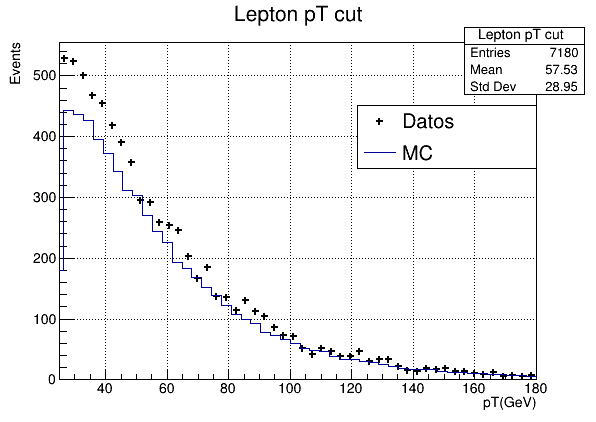

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file ./figsDataVsMC/comp_lep_pT.png has been created


In [28]:
TCanvas *canvas = new TCanvas("Canvas","",600,450); canvas->SetGrid(); TLegend *leg = new TLegend(0.6,0.6,0.9,0.75);

hist_lep_pt_cut->SetMarkerStyle(50);
hist_lep_pt_cut->Draw("p");

leg->AddEntry(hist_lep_pt_cut, "Datos", "p"); leg->AddEntry(hist_lep_pt_MC, "MC", "l"); leg->Draw();
hist_lep_pt_MC->Draw("samehist"); canvas->Draw(); canvas->SaveAs("./figsDataVsMC/comp_lep_pT.png")

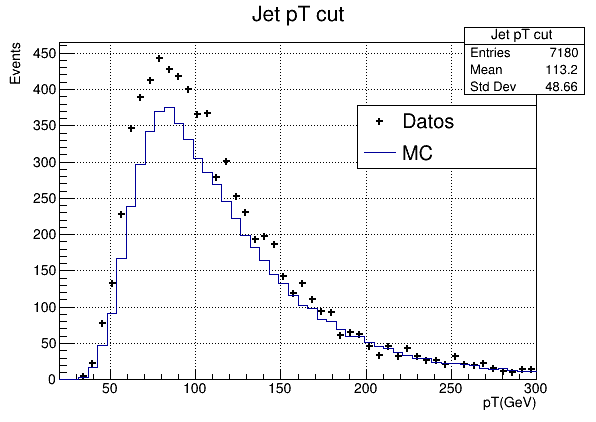

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file ./figsDataVsMC/comp_jet_pT.png has been created


In [29]:
TCanvas *canvas = new TCanvas("Canvas","",600,450); canvas->SetGrid(); TLegend *leg = new TLegend(0.6,0.6,0.9,0.75);

hist_jet_pt_cut->SetMarkerStyle(50);
hist_jet_pt_cut->Draw("p");

leg->AddEntry(hist_jet_pt_cut, "Datos", "p"); leg->AddEntry(hist_jet_pt_MC, "MC", "l"); leg->Draw();
hist_jet_pt_MC->Draw("samehist"); canvas->Draw(); canvas->SaveAs("./figsDataVsMC/comp_jet_pT.png")

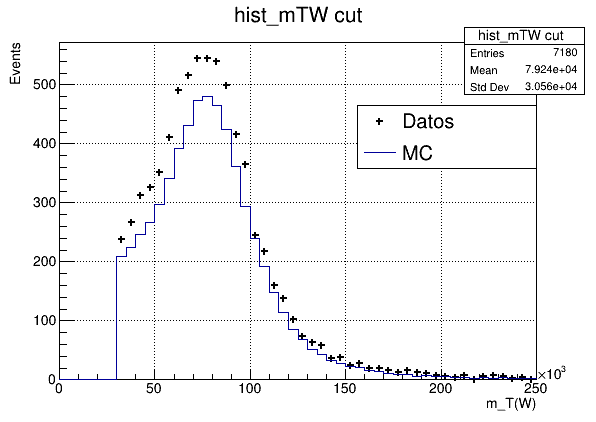

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file ./figsDataVsMC/comp_mTW.png has been created


In [21]:
TCanvas *canvas = new TCanvas("Canvas","",600,450); canvas->SetGrid(); TLegend *leg = new TLegend(0.6,0.6,0.9,0.75);

hist_mTW_cut->SetMarkerStyle(50);
hist_mTW_cut->Draw("p");

leg->AddEntry(hist_mTW_cut, "Datos", "p"); leg->AddEntry(hist_mTW_MC, "MC", "l"); leg->Draw();
hist_mTW_MC->Draw("samehist"); canvas->Draw(); canvas->SaveAs("./figsDataVsMC/comp_mTW.png")

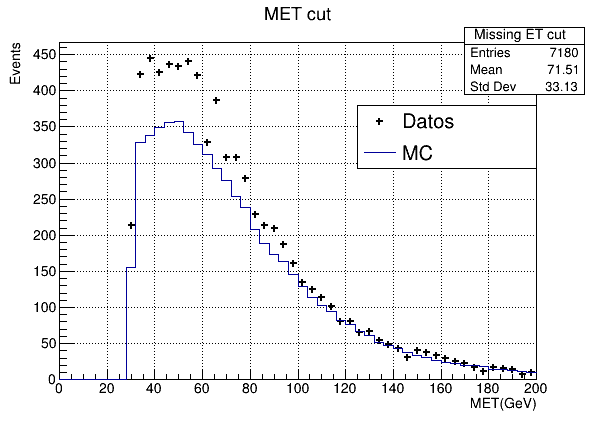

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file ./figsDataVsMC/comp_MET.png has been created


In [22]:
TCanvas *canvas = new TCanvas("Canvas","",600,450); canvas->SetGrid(); TLegend *leg = new TLegend(0.6,0.6,0.9,0.75);

hist_MET_cut->SetMarkerStyle(50);
hist_MET_cut->Draw("p");

leg->AddEntry(hist_MET_cut, "Datos", "p"); leg->AddEntry(hist_MET_MC, "MC", "l"); leg->Draw();
hist_MET_MC->Draw("samehist"); canvas->Draw(); canvas->SaveAs("./figsDataVsMC/comp_MET.png")

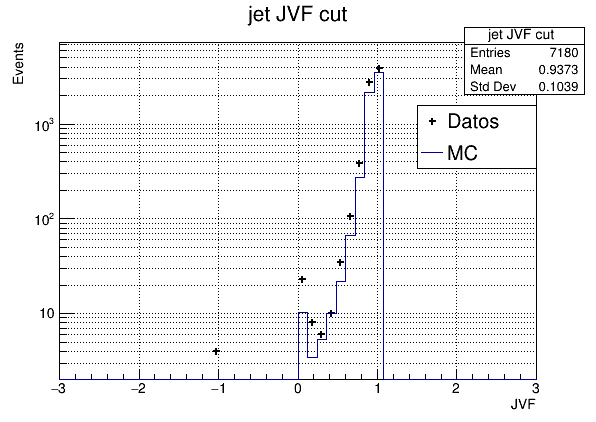

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file ./figsDataVsMC/comp_JVF.png has been created


In [30]:
TCanvas *canvas = new TCanvas("Canvas","",600,450); canvas->SetGrid(); TLegend *leg = new TLegend(0.7,0.6,0.9,0.75);

hist_jet_jvf_cut->SetMarkerStyle(50);
hist_jet_jvf_cut->Draw("p");

leg->AddEntry(hist_jet_jvf_cut, "Datos", "p"); leg->AddEntry(hist_jet_jvf_MC, "MC", "l"); leg->Draw();
hist_jet_jvf_MC->Draw("samehist"); canvas->SetLogy(); canvas->Draw(); canvas->SaveAs("./figsDataVsMC/comp_JVF.png")

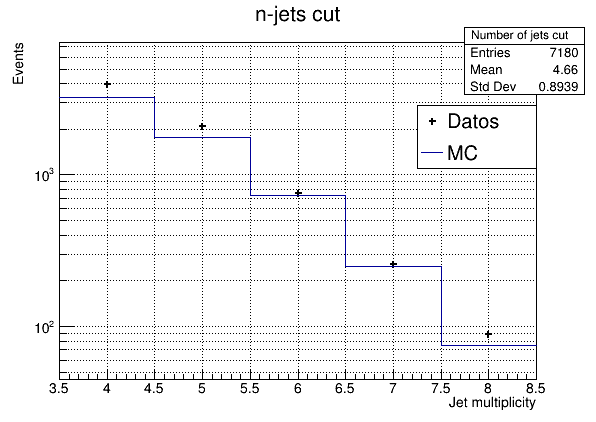

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file ./figsDataVsMC/comp_njets.png has been created


In [24]:
TCanvas *canvas = new TCanvas("Canvas","",600,450); canvas->SetGrid(); TLegend *leg = new TLegend(0.7,0.6,0.9,0.75);

hist_njets_cut->SetMarkerStyle(50); hist_njets_cut->Draw("p");

leg->AddEntry(hist_njets_cut, "Datos", "p"); leg->AddEntry(hist_njets_MC, "MC", "l"); leg->Draw();
hist_njets_MC->Draw("samehist"); canvas->SetLogy(); canvas->Draw(); canvas->SaveAs("./figsDataVsMC/comp_njets.png")

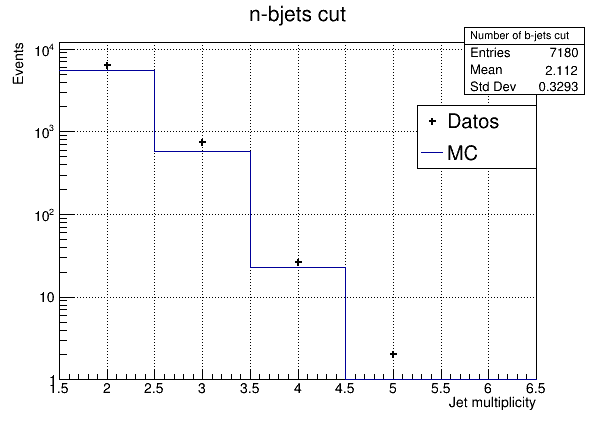

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file ./figsDataVsMC/comp_bjets.png has been created


In [25]:
TCanvas *canvas = new TCanvas("Canvas","",600,450); canvas->SetGrid(); TLegend *leg = new TLegend(0.7,0.6,0.9,0.75);

hist_bjets_cut->SetMarkerStyle(50);
hist_bjets_cut->Draw("p");

leg->AddEntry(hist_bjets_cut, "Datos", "p"); leg->AddEntry(hist_bjets_MC, "MC", "l"); leg->Draw();
hist_bjets_MC->Draw("samehist"); canvas->SetLogy(); canvas->Draw(); canvas->SaveAs("./figsDataVsMC/comp_bjets.png")

In [11]:
jet_pt

(Float_t [10]) { 0.00000f, 0.00000f, 0.00000f, 0.00000f, 0.00000f, 0.00000f, 0.00000f, 0.00000f, 0.00000f, 0.00000f }
